## NLP Class Assignment 3

In [1]:
import pandas as pd
import numpy as np

import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.metrics import jaccard_distance
from itertools import combinations
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.metrics import jaccard_distance
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

#### Read news data

In [2]:
news_path = 'https://storage.googleapis.com/msca-bdp-data-open/news/nlp_a_3_news.json'
news_df = pd.read_json(news_path, orient='records', lines=True)

print(f'Sample contains {news_df.shape[0]:,.0f} news articles')
news_df.head(2)

Sample contains 1,018 news articles


,url,date,language,title,text
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik..."
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar..."


#### Read Tweets data

In [3]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_3_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(2)

Sample contains 1,020 tweets


,id,lang,date,name,retweeted,text
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN"


### NEWS DATA

#### For title only

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Clean and preprocess the news articles
stopwords = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    text = text.lower()
    text = re.sub('[\n\r\t]', ' ', text)

    words = word_tokenize(text)
    
    # Remove single-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 1]
    
    # Remove numbers
    words = [word for word in words if not word.isnumeric()]

    # Remove punctuation
    words = [word for word in words if word.isalpha()]

    # Remove stopwords
    words = [word for word in words if word not in stopwords]

    #Lemmatization
    # words = [lemmatizer.lemmatize(word) for word in words]
    
    return words

In [26]:
news_df['Tokens'] = news_df['title'].apply(lambda x: clean_text(x)).reset_index(drop=True)
news_df.head()

,url,date,language,title,text,Tokens,text_Tokens,title_text,title_text_tokens,article_number,articles_similar,articles_tokens_similar,score
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik...","[lml, bikes, car, dealers, lml, bikes, showrooms, india]","[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, new...","Lml Bikes Car Dealers - Lml Bikes Showrooms in IndiaLml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompa...","[lml, bikes, car, dealers, lml, bikes, showrooms, indialml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesem...","[539, 539, 539, 539, 539]","Article 539: Aprilia Bikes Car Dealers - Aprilia Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calcula...","Article 539: ['aprilia', 'bikes', 'car', 'dealers', 'aprilia', 'bikes', 'showrooms', 'india', 'explore', 'friday', 'january', 'log', 'searchnotificationstop', 'sectionsauto', 'newscar', 'newsbike', 'newslatestauto', 'newsphotosvideoselectric', 'vehiclestrendingmy', 'readsoffersnewfind', 'carsfind', 'bikescompare', 'carscompare', 'bikesemi', 'calculatordealersexplore', 'autoabout', 'uscontact', 'ussitemaprssterms', 'useprivacy', 'policycopyright', 'ht', 'media', 'limited', 'rights', 'carsfind...",0.840491
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDea

Mean Jaccard Similarity for 2-grams = 0.43621826953733156
Mean Jaccard Similarity for 3-grams = 0.4144117261375757
Mean Jaccard Similarity for 4-grams = 0.3964738175917604
Mean Jaccard Similarity for 5-grams = 0.3788075802655032
Mean Jaccard Similarity for 6-grams = 0.36094060166446307
Mean Jaccard Similarity for 7-grams = 0.33753681188634244



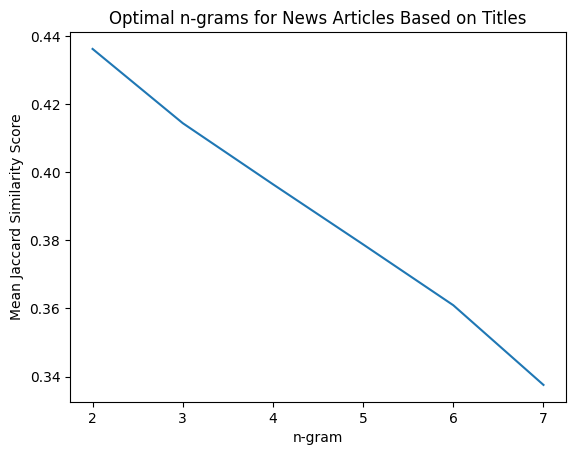

In [27]:
# Identify n-grams and find the best one
ngram_list = []
jaccard_scores = []
article_number = []

for n in range(2, 8):
    for i, text in enumerate(news_df['Tokens']):
        if i != len(news_df) - 1:
            text_ngrams = set(nltk.ngrams(text, n))
            scores = []
            if len(text_ngrams) != 0:
                for j, compare_text in enumerate(news_df['Tokens']):
                    if j != i:
                        compare_text_ngrams = set(nltk.ngrams(compare_text, n))
                        if len(compare_text_ngrams) != 0:
                            jd = 1 - jaccard_distance(text_ngrams, compare_text_ngrams)
                            scores.append(jd)
                        else:
                            scores.append(0)
                max_score = max(scores)
            jaccard_scores.append(max_score)
    mean_jaccard_score = sum(jaccard_scores)/len(jaccard_scores)
    ngram_list.append(mean_jaccard_score)

for n in range(2, 8):
    print("Mean Jaccard Similarity for " + str(n) + "-grams = " + str(ngram_list[n-2]))
print()

# Plot the ngram_list against n
plt.plot(range(2, 8), ngram_list)
plt.xlabel('n-gram')
plt.ylabel('Mean Jaccard Similarity Score')
plt.title('Optimal n-grams for News Articles Based on Titles')
plt.show()

For text only

In [28]:
news_df['text_Tokens'] = news_df['text'].apply(lambda x: clean_text(x))
news_df.head()

,url,date,language,title,text,Tokens,text_Tokens,title_text,title_text_tokens,article_number,articles_similar,articles_tokens_similar,score
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik...","[lml, bikes, car, dealers, lml, bikes, showrooms, india]","[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, new...","Lml Bikes Car Dealers - Lml Bikes Showrooms in IndiaLml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompa...","[lml, bikes, car, dealers, lml, bikes, showrooms, indialml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesem...","[539, 539, 539, 539, 539]","Article 539: Aprilia Bikes Car Dealers - Aprilia Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calcula...","Article 539: ['aprilia', 'bikes', 'car', 'dealers', 'aprilia', 'bikes', 'showrooms', 'india', 'explore', 'friday', 'january', 'log', 'searchnotificationstop', 'sectionsauto', 'newscar', 'newsbike', 'newslatestauto', 'newsphotosvideoselectric', 'vehiclestrendingmy', 'readsoffersnewfind', 'carsfind', 'bikescompare', 'carscompare', 'bikesemi', 'calculatordealersexplore', 'autoabout', 'uscontact', 'ussitemaprssterms', 'useprivacy', 'policycopyright', 'ht', 'media', 'limited', 'rights', 'carsfind...",0.840491
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDea

Mean Jaccard Similarity for 2-grams = 0.5981274149464136
Mean Jaccard Similarity for 3-grams = 0.5879676728608425
Mean Jaccard Similarity for 4-grams = 0.5796929093447755
Mean Jaccard Similarity for 5-grams = 0.5724850680863938
Mean Jaccard Similarity for 6-grams = 0.565852851055774
Mean Jaccard Similarity for 7-grams = 0.5596991711236627



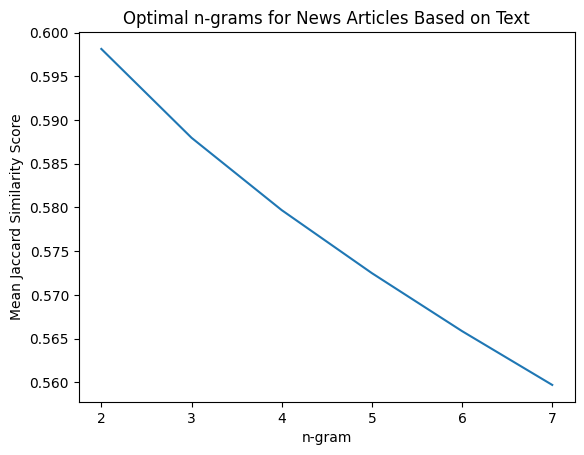

In [29]:
# Identify n-grams and find the best one
ngram_list = []
jaccard_scores = []
article_number = []

for n in range(2, 8):
    for i, text in enumerate(news_df['text_Tokens']):
        if i != len(news_df) - 1:
            text_ngrams = set(nltk.ngrams(text, n))
            scores = []
            if len(text_ngrams) != 0:
                for j, compare_text in enumerate(news_df['text_Tokens']):
                    if j != i:
                        compare_text_ngrams = set(nltk.ngrams(compare_text, n))
                        if len(compare_text_ngrams) != 0:
                            jd = 1 - jaccard_distance(text_ngrams, compare_text_ngrams)
                            scores.append(jd)
                        else:
                            scores.append(0)
                max_score = max(scores)
            jaccard_scores.append(max_score)
    mean_jaccard_score = sum(jaccard_scores)/len(jaccard_scores)
    ngram_list.append(mean_jaccard_score)

for n in range(2, 8):
    print("Mean Jaccard Similarity for " + str(n) + "-grams = " + str(ngram_list[n-2]))
print()

# Plot the ngram_list against n
plt.plot(range(2, 8), ngram_list)
plt.xlabel('n-gram')
plt.ylabel('Mean Jaccard Similarity Score')
plt.title('Optimal n-grams for News Articles Based on Text')
plt.show()

For title + text

In [30]:
news_df['title_text'] = news_df['title'] + news_df['text']
news_df['title_text_tokens'] = news_df['title_text'].apply(lambda x: clean_text(x))
news_df.head()

,url,date,language,title,text,Tokens,text_Tokens,title_text,title_text_tokens,article_number,articles_similar,articles_tokens_similar,score
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik...","[lml, bikes, car, dealers, lml, bikes, showrooms, india]","[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, new...","Lml Bikes Car Dealers - Lml Bikes Showrooms in IndiaLml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompa...","[lml, bikes, car, dealers, lml, bikes, showrooms, indialml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesem...","[539, 539, 539, 539, 539]","Article 539: Aprilia Bikes Car Dealers - Aprilia Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calcula...","Article 539: ['aprilia', 'bikes', 'car', 'dealers', 'aprilia', 'bikes', 'showrooms', 'india', 'explore', 'friday', 'january', 'log', 'searchnotificationstop', 'sectionsauto', 'newscar', 'newsbike', 'newslatestauto', 'newsphotosvideoselectric', 'vehiclestrendingmy', 'readsoffersnewfind', 'carsfind', 'bikescompare', 'carscompare', 'bikesemi', 'calculatordealersexplore', 'autoabout', 'uscontact', 'ussitemaprssterms', 'useprivacy', 'policycopyright', 'ht', 'media', 'limited', 'rights', 'carsfind...",0.840491
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDea

Mean Jaccard Similarity for 2-grams = 0.5973396809162339
Mean Jaccard Similarity for 3-grams = 0.5857471998840507
Mean Jaccard Similarity for 4-grams = 0.5761286632607941
Mean Jaccard Similarity for 5-grams = 0.5677162838028219
Mean Jaccard Similarity for 6-grams = 0.5600492732496924
Mean Jaccard Similarity for 7-grams = 0.5529107085453548



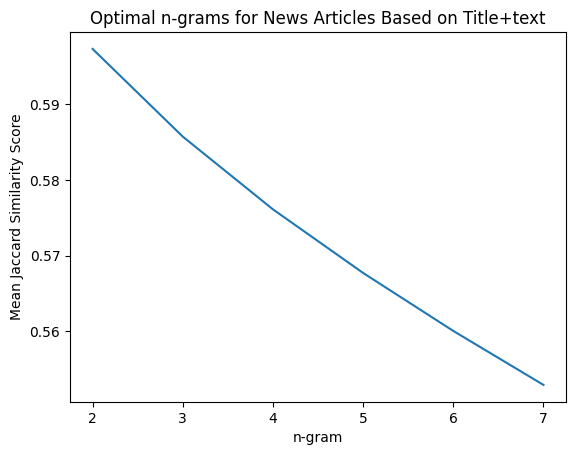

In [31]:
# Identify n-grams and find the best one
ngram_list = []
jaccard_scores = []
article_number = []

for n in range(2, 8):
    for i, text in enumerate(news_df['title_text_tokens']):
        if i != len(news_df) - 1:
            text_ngrams = set(nltk.ngrams(text, n))
            scores = []
            if len(text_ngrams) != 0:
                for j, compare_text in enumerate(news_df['title_text_tokens']):
                    if j != i:
                        compare_text_ngrams = set(nltk.ngrams(compare_text, n))
                        if len(compare_text_ngrams) != 0:
                            jd = 1 - jaccard_distance(text_ngrams, compare_text_ngrams)
                            scores.append(jd)
                        else:
                            scores.append(0)
                max_score = max(scores)
            jaccard_scores.append(max_score)
    mean_jaccard_score = sum(jaccard_scores)/len(jaccard_scores)
    ngram_list.append(mean_jaccard_score)

for n in range(2, 8):
    print("Mean Jaccard Similarity for " + str(n) + "-grams = " + str(ngram_list[n-2]))
print()

# Plot the ngram_list against n
plt.plot(range(2, 8), ngram_list)
plt.xlabel('n-gram')
plt.ylabel('Mean Jaccard Similarity Score')
plt.title('Optimal n-grams for News Articles Based on Title+text')
plt.show()

Taking n_gram = 4 as that's when there's a slightly bigger change occuring for titles. Taking text of news articles as there doesn't appear to be significant difference between text, title or both together.

In [80]:
news_df['article_number'] = ''
news_df['article'] = ''
news_df['j'] = ''
for i, text in enumerate(news_df['text_Tokens']):
    if i != len(news_df) - 1:
        text_ngrams = set(nltk.ngrams(text, 4))
        scores = ''
        max_scores_list = []
        index_list = []
        news_grams = ''
        j_k = ''
        iteration_df = pd.DataFrame(columns = ['text_ngrams','score','jk'])
        if len(text_ngrams) != 0:
            for j, compare_text in enumerate(news_df['text_Tokens']):
                if j != i:
                    compare_text_ngrams = set(nltk.ngrams(compare_text, 4))
                    index_list.append(j)
                    news_grams = compare_text_ngrams
                    if len(compare_text_ngrams) != 0:
                        jd = 1 - jaccard_distance(text_ngrams, compare_text_ngrams)
                        jd_new = text_ngrams.intersection(compare_text_ngrams)
                        j_k = jd_new
                        scores = jd
                    else:
                        scores = -1
                        j_k = []
                    iteration_df.at[j,'text_ngrams'] = news_grams
                    iteration_df.at[j,'score'] = scores
                    iteration_df.at[j,'jk'] = j_k
        
        # if len(scores) != 0:
        #     max_score = max(scores)
        #     if max_score > 0:
        #         for x in scores:
        #             if x == max_score:
        #                 max_scores_list.append(scores.index(x) + 1)    
        max_iteration = iteration_df[iteration_df['score'] == iteration_df['score'].max()]
        # print(max_iteration)
        news_df.at[i, 'article_number'] = max_iteration['text_ngrams'].index
        news_df.at[i, 'score'] = iteration_df['score'].max()
        # print(news_grams[539])
        try:
            news_df.at[i, 'article'] = list(max_iteration['text_ngrams'])
            news_df.at[i, 'j'] = list(max_iteration['jk'])
        except:
            news_df.at[i, 'article'] = []
            news_df.at[i, 'j'] = []


# tweets_df.head()

news_df['articles_similar'] = ''
news_df['articles_tokens_similar'] = ''
for k, tweet_number in enumerate(news_df['article_number']):
    if len(tweet_number) > 0:
        x = ''
        y = ''
        for i in tweet_number:
            x = x + "Article " + str(i) + ": " + str(news_df['text'].iloc[i]) + "\n"
            y = y + "Article " + str(i) + ": " + str(news_df['text_Tokens'].iloc[i]) + "\n"
        news_df.at[k, 'articles_similar'] = x
        news_df.at[k, 'articles_tokens_similar'] = y

In [81]:
news_df_similar = news_df[news_df['articles_similar']!='']
news_df_similar[[ 'text_Tokens', 'articles_tokens_similar', 'article', 'j']].tail(2)

,text_Tokens,articles_tokens_similar,article,j
1015,"[honda, city, hev, hybrid, launched, india, rs, lakh, cartrade, type, location, recently, viewedtrending, searches, used, cars, city, delhincrmumbaibangalorehyderabadchennaiallcities, price, lakh, brand, marutisuzukihyundaivolkswagentatatoyotahondaallbrandsused, car, priceexplore, used, carscartrade, certification, new, cars, price, upto, lakh, lakh, lakh, lakh, lakh, lakh, lakh, lakh, lakh, lakh, lakh, lakh, crore, crore, brand, marutisuzukihyundaivolkswagentatatoyotahondaviewall, brandsonr...","Article 675: ['kia', 'seltos', 'launched', 'india', 'prices', 'start', 'lakh', 'cartrade', 'type', 'location', 'used', 'cars', 'city', 'delhincrmumbaibangalorehyderabadchennaiallcities', 'price', 'lakh', 'brand', 'marutisuzukihyundaivolkswagentatatoyotahondaallbrandsused', 'car', 'priceexplore', 'used', 'carscartrade', 'certification', 'new', 'cars', 'price', 'upto', 'lakh', 'lakh', 'lakh', 'lakh', 'lakh', 'lakh', 'lakh', 'lakh', 'lakh', 'lakh', 'lakh', 'lakh', 'crore', 'crore', 'brand', 'ma...","[{(silver, specific, updated, suv), (brandsonroad, priceupcomingcarsnewcar, launchescarrecommenderemicalculatorcarvideos, car), (line, rs, lakhonwardsallkia, carsupcomingkia), (lakhonwardsallkia, carsupcomingkia, cars, seltosshare), (logo, two, fresh, colours), (lakhx, line, rs, lakhdiesel), (lakhhtx, rs, lakhhtx, rs), (standard, across, suv, gtx), (brand, also, given, suv), (lakh, update, variants, suv), (transmission, options, include, imt), (located, arcot, road, maruti), (sell, car, news...","[{(news, reviews, car, newsexpertreviewsexpertcomparisonsuserreviewswritea), (favour, cartrade, tech, mobilesitepopular), (brandsonroad, priceupcomingcarsnewcar, launchescarrecommenderemicalculatorcarvideos, car), (matching, results, found, try), (price, upto, lakh, lakh), (lakh, avg, pricehyundai, lakh), (carscartrade, certification, new, cars), (vishwaroop, park, pranavanandji, marg), (every, month, offer, various), (marutisuzukihyundaivolkswagentatatoyotahondaviewall, brandsonroad, priceu..."
1016,"[war, could, escalate, auto, prices, shortages, germany, bmw, halts, production, mercedes, scales, zimbabwe, mail, homezimbabweworld, newsbusinesstechnologysportsentertainmentopinionabout, us, headlinespoliticseconomic, analysisbankingfarming, enviromenteducationrelationshipsreligionlaw, crime, news, ticker, april, us, curves, war, talks, peace, war, batters, economiesworld, news, april, barcelona, edges, sevilla, move, spanish, leaguesports, april, inter, wins, juventus, napoli, beats, atal...","Article 564: ['war', 'could', 'drive', 'car', 'prices', 'even', 'higher', 'well', 'next', 'year', 'wwti', 'contentwwti', 'toggle', 'menuopen', 'navigationclose', 'navigationsearchplease', 'enter', 'search', 'mobile', 'liveblack', 'history', 'monthalex', 'hazard', 'life', 'hacksboat', 'smart', 'boat', 'safehappy', 'hourhoroscopeslotterymade', 'nnymade', 'nny', 'minutesnewslettersnews', 'tipssweetest', 'occasion', 'sundaysveterans', 'voiceswalkthrough', 'wednesdaysnewssubmit', 'news', 'nowcons...","[{(gas, used, lasers, etch), (still, joseph, massaro, aptiv), (ago, new, yorkcarthage, savings), (pocketnational, newsnew, york, newspoliticstransition), (steelmakers, need, switch, production), (type, normal, commercial, aptiv), (releasestop, storiesnew, congressional, map), (production, flow, deal, negotiated), (city, school, district, security), (rent, necessities, likely, leave), (overall, high, united, states), (sanctions, russian, exports, would), (smith, newsnation, days, ago), (congo...","[{(gas, used, lasers, etch), (still, joseph, massaro, aptiv), (steelmakers, need, switch, production), (type, normal, commercial, aptiv), (production, flow, deal, negotiated), (rent, necessities, likely, leave), (sanctions, russian, exports, would), (overall, high, united, states), (automakers, would, build, million), (hurt, wells, fargo, estimates), (despite, war, harness, makers), (aluminum, producer, source, pig), (last, 

The above shows two examples where the news articles are similar based on 4-grams

# TWEETS DATA

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
stopwords = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    text = text.lower()
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
    text = re.sub('[\n\r\t]', ' ', text)
    text = re.sub('#\w+', '', text)
    text = re.sub('@\w+', '', text)
    
    # Use TweetTokenizer
    tweet_tokenizer = nltk.tokenize.TweetTokenizer()
    words = tweet_tokenizer.tokenize(text)
    # words = word_tokenize(text)
    
    # Remove single-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 1]
    
    # Remove numbers
    words = [word for word in words if not word.isnumeric()]

    # Remove punctuation
    words = [word for word in words if word.isalpha()]

    # Remove stopwords
    words = [word for word in words if word not in stopwords]

    #Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words

tweets_df['text_cleaned'] = tweets_df['text'].apply(lambda x: clean_tweet(x)).reset_index(drop=True)
tweets_df.head()

,id,lang,date,name,retweeted,text,text_cleaned
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,"[straight, swap, renault, twingo, extreme, awesome]"
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN","[australian, gp, qualifying, melbourne, march, grid, row, eddie, irvine, ferrari, mika, hakkinen, row, johnny, herbert, jean, alesi]"
2,1505982695129718784,en,2022-03-21,Colin N. Walker 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙😷 #FBPE,RT,#BoycottRenault\n\nThink of the blood of thousands of Ukrainian women and children pouring from every Renault car. \n\nhttps://t.co/rbU01Sy9DU,"[think, blood, thousand, ukrainian, woman, child, pouring, every, renault, car]"
3,1516744110463463426,en,2022-04-20,Yvette Lissman,RT,"Almost 200,000 workers in Russia still on western payrolls\n\nMcDonald’s, IKEA, Renault, Levi Strauss, &amp;others pay salaries to thousands of their employees while their operations in🇷🇺are suspended\nCoca-Cola, Yum Brands,KFC didn't confirm if they still pay🇷🇺s https://t.co/KWDhCo1dM0","[almost, worker, russia, still, western, payroll, mcdonald, ikea, renault, levi, strauss, others, pay, salary, thousand, employee, operation, suspended, yum, brand, kfc, confirm, still, pay]"
4,1493777143347630086,en,2022-02-16,Andile Xaba 🇿🇦,RT,Take a selfie with the New #Renault #ClioV and WIN R1000 fuel voucher 💥 tag @tableviewrenault &amp; #renaulttableviewcliov random winner announced 28.02.2022 @BradAtRenault 0825662336 to book a test drive 🇿🇦 https://t.co/D7V2GnJa8B,"[take, selfie, new, win, fuel, voucher, tag, random, winner, announced, book, test, drive]"


Mean Jaccard Similarity for 2-grams = 0.3559597253232056
Mean Jaccard Similarity for 3-grams = 0.3392315675588495
Mean Jaccard Similarity for 4-grams = 0.3342028651055565
Mean Jaccard Similarity for 5-grams = 0.3332790830523492



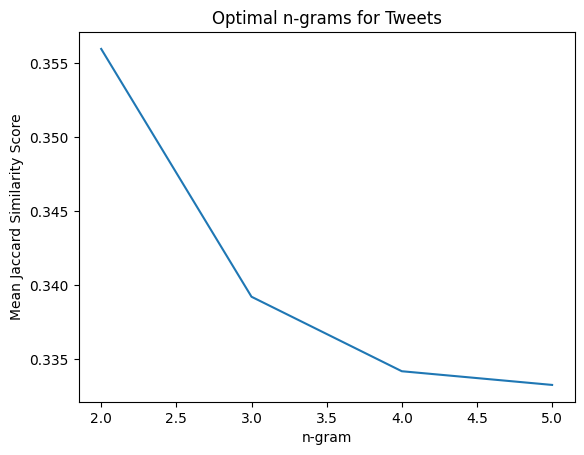

In [14]:
# Identify n-grams and find the best one
ngram_list = []
jaccard_scores = []
article_number = []

for n in range(2, 6):
    for i, text in enumerate(tweets_df['text_cleaned']):
        if i != len(news_df) - 1:
            text_ngrams = set(nltk.ngrams(text, n))
            scores = []
            if len(text_ngrams) != 0:
                for j, compare_text in enumerate(tweets_df['text_cleaned']):
                    if j != i:
                        compare_text_ngrams = set(nltk.ngrams(compare_text, n))
                        if len(compare_text_ngrams) != 0:
                            jd = 1 - jaccard_distance(text_ngrams, compare_text_ngrams)
                            scores.append(jd)
                        else:
                            scores.append(0)
                max_score = max(scores)
            jaccard_scores.append(max_score)
    mean_jaccard_score = sum(jaccard_scores)/len(jaccard_scores)
    ngram_list.append(mean_jaccard_score)

for n in range(2, 6):
    print("Mean Jaccard Similarity for " + str(n) + "-grams = " + str(ngram_list[n-2]))
print()

# Plot the ngram_list against n
plt.plot(range(2, 6), ngram_list)
plt.xlabel('n-gram')
plt.ylabel('Mean Jaccard Similarity Score')
plt.title('Optimal n-grams for Tweets')
plt.show()

Taking n-gram = 3 as that is the point where the elbow occurs

In [15]:
tweets_df['tweet_number'] = ''
for i, text in enumerate(tweets_df['text_cleaned']):
    if i != len(news_df) - 1:
        text_ngrams = set(nltk.ngrams(text, 3))
        scores = []
        max_scores_list = []
        index_list = []
        tweet_grams = []
        if len(text_ngrams) != 0:
            for j, compare_text in enumerate(tweets_df['text_cleaned']):
                if j != i:
                    compare_text_ngrams = set(nltk.ngrams(compare_text, 3))
                    index_list.append(j)
                    tweet_grams.append(compare_text_ngrams)
                    if len(compare_text_ngrams) != 0:
                        jd = 1 - jaccard_distance(text_ngrams, compare_text_ngrams)
                        scores.append(jd)
                    else:
                        scores.append(-1)
        
        if len(scores) != 0:
            max_score = max(scores)
            if max_score > 0:
                for x in scores:
                    if x == max_score:
                        max_scores_list.append(scores.index(x) + 1)
            
        
        tweets_df.at[i, 'tweet_number'] = max_scores_list


# tweets_df.head()

tweets_df['tweets_similar'] = ''
tweets_df['tweets_tokens_similar'] = ''
for k, tweet_number in enumerate(tweets_df['tweet_number']):
    if len(tweet_number) > 0:
        x = ''
        y = ''
        for i in tweet_number:
            x = x + "Tweet " + str(i) + ": " + str(tweets_df['text'].iloc[i]) + "\n"
            y = y + "Tweet " + str(i) + ": " + str(tweets_df['text_cleaned'].iloc[i]) + "\n"
        tweets_df.at[k, 'tweets_similar'] = x
        tweets_df.at[k, 'tweets_tokens_similar'] = y

In [17]:
tweets_df_similar = tweets_df[tweets_df['tweets_similar']!='']
tweets_df_similar[['text', 'text_cleaned', 'tweets_similar', 'tweets_tokens_similar']].head(2)

,text,text_cleaned,tweets_similar,tweets_tokens_similar
1,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN","[australian, gp, qualifying, melbourne, march, grid, row, eddie, irvine, ferrari, mika, hakkinen, row, johnny, herbert, jean, alesi]","Tweet 197: French GP, Magny-Cours, 29th June 1997 🇫🇷 #F1\nPole / Race Winner / Fastest Lap:\nMichael Schumacher (Ferrari) 🏁 🇩🇪 🏆🍾\n2nd: Heinz-Harald Frentzen (Williams-Renault) 🇩🇪\n3rd: Eddie Irvine (Ferrari) ☘️🇬🇧 https://t.co/wFLqIODR9D\n","Tweet 197: ['french', 'gp', 'june', 'pole', 'race', 'winner', 'fastest', 'lap', 'michael', 'schumacher', 'ferrari', 'frentzen', 'eddie', 'irvine', 'ferrari']\n"
3,"Almost 200,000 workers in Russia still on western payrolls\n\nMcDonald’s, IKEA, Renault, Levi Strauss, &amp;others pay salaries to thousands of their employees while their operations in🇷🇺are suspended\nCoca-Cola, Yum Brands,KFC didn't confirm if they still pay🇷🇺s https://t.co/KWDhCo1dM0","[almost, worker, russia, still, western, payroll, mcdonald, ikea, renault, levi, strauss, others, pay, salary, thousand, employee, operation, suspended, yum, brand, kfc, confirm, still, pay]","Tweet 453: Almost 200,000 workers in Russia still on western payrolls\n\nMcDonald’s, IKEA, Renault, Levi Strauss, &amp;others pay salaries to thousands of their employees while their operations in🇷🇺are suspended\nCoca-Cola, Yum Brands,KFC didn't confirm if they still pay🇷🇺s https://t.co/KWDhCo1dM0\n","Tweet 453: ['almost', 'worker', 'russia', 'still', 'western', 'payroll', 'mcdonald', 'ikea', 'renault', 'levi', 'strauss', 'others', 'pay', 'salary', 'thousand', 'employee', 'operation', 'suspended', 'yum', 'brand', 'kfc', 'confirm', 'still', 'pay']\n"


The above shows two examples where the tweets are similar based on 3-grams